In [23]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

from IPython.display import Image
PATH = "/Users/Song/Desktop/Tensorflow codes/Pictures/"

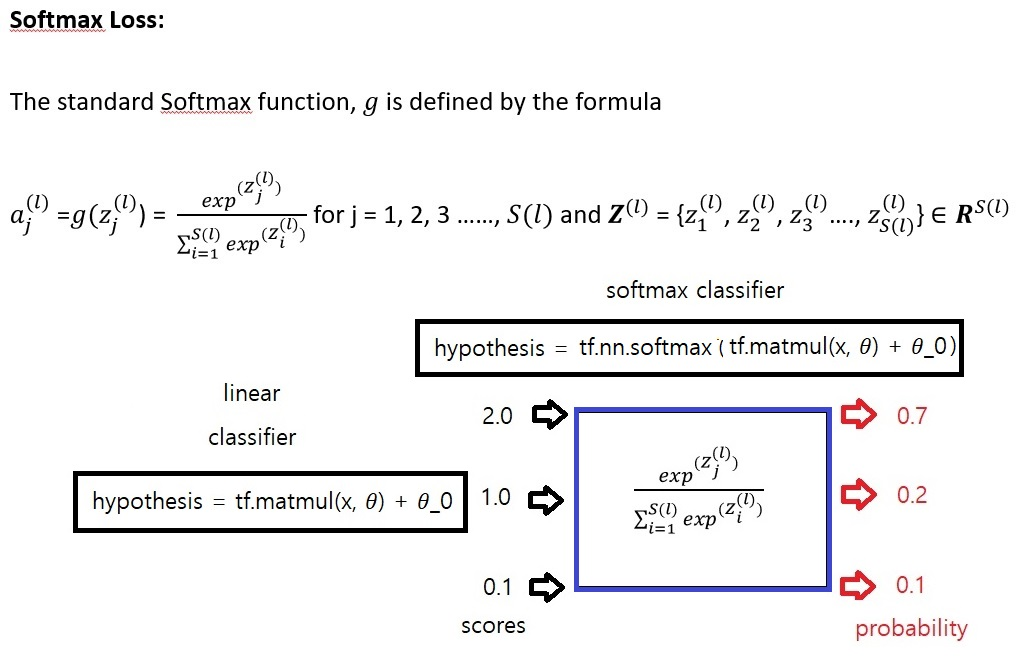

In [24]:
# softmax classification

Image(filename = PATH + "25.jpg")

In [25]:
# one-hot encoded data

x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

In [26]:
# placeholders for a tensor that are always fed

x = tf.placeholder("float", [None, 4])
y = tf.placeholder("float", [None, 3])

In [27]:
# variables

nb_classes = 3 # number of classes

𝜃_0 = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')
𝜃 = tf.Variable(tf.random_normal([4, nb_classes]), name = 'weight')

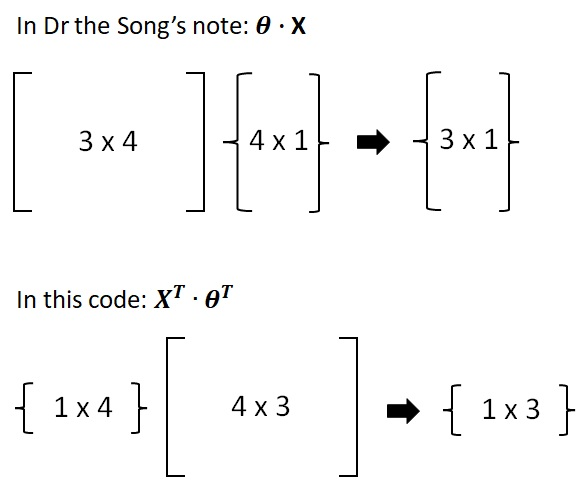

In [34]:
# notations of matrix mutiplication 

Image(filename = PATH + "49.jpg")

In [28]:
# tf.nn.softmax activates softmax classifier

hypothesis = tf.nn.softmax(tf.matmul(x, 𝜃) + 𝜃_0)

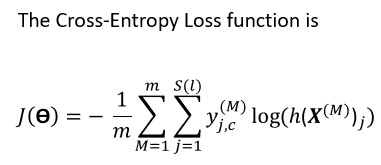

In [29]:
Image(filename = PATH + "26.jpg")

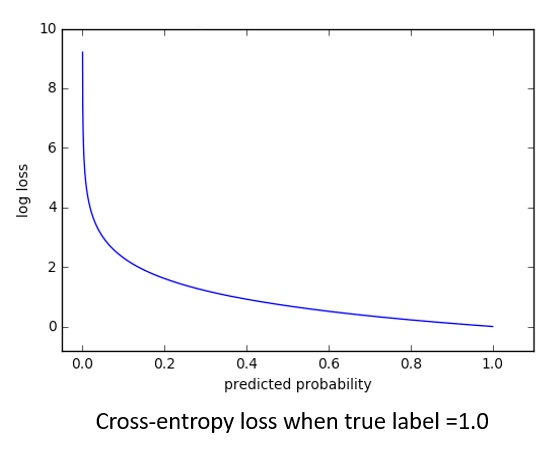

In [30]:
Image(filename = PATH + "27.jpg")

In [31]:
# cross entropy cost(loss) function

cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hypothesis), axis=1))

In [32]:
# minimize the cost function

train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [33]:
# lauch the tf graph in a session

with tf.Session() as sess:
    
    # Initialize tensorflow variables
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        
        cost_val, _ = sess.run([cost, train], feed_dict = {x: x_data, y: y_data})
        h = sess.run(hypothesis, feed_dict = {x: x_data, y: y_data})
        
        if step % 500 == 0:
            print(step, cost_val, h) # it prints the cost value of each step and the probability of each class at the step

0 3.8793988 [[0.03497557 0.9227603  0.04226415]
 [0.33969513 0.48458746 0.17571746]
 [0.01978313 0.9739489  0.006268  ]
 [0.11132797 0.8645112  0.02416088]
 [0.00124556 0.9724701  0.02628433]
 [0.05219865 0.83766997 0.11013135]
 [0.00556447 0.91107994 0.08335561]
 [0.00312079 0.911909   0.08497021]]
500 0.42330712 [[1.5627238e-03 3.4979288e-02 9.6345800e-01]
 [1.5108434e-02 2.0256910e-01 7.8232241e-01]
 [1.2664644e-04 4.7788098e-01 5.2199233e-01]
 [3.1533258e-04 7.8021944e-01 2.1946529e-01]
 [2.3866385e-01 7.3088098e-01 3.0455193e-02]
 [9.2716314e-02 9.0690279e-01 3.8091978e-04]
 [3.9641717e-01 6.0232228e-01 1.2605473e-03]
 [5.2528429e-01 4.7454748e-01 1.6825004e-04]]
1000 0.23694107 [[1.08631364e-04 7.14736013e-03 9.92743969e-01]
 [7.42567191e-03 1.30009010e-01 8.62565279e-01]
 [7.37802384e-06 2.55535871e-01 7.44456708e-01]
 [6.55393960e-05 7.63365328e-01 2.36569181e-01]
 [3.50303054e-01 6.29015863e-01 2.06810962e-02]
 [1.80507869e-01 8.19391429e-01 1.00701254e-04]
 [6.98675990e-01 3.